## INGENIERIA DE CARACTERISTICAS
### Laboratorio #3 – Ingeniería de Características
### Marcos Alexander Muchuch Simon - 13218020

In [59]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy import stats
import numpy as np

In [28]:
#Conneccion a base de datos. 
dataHP = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTFV-2l0Wc-Bz7LTxcETdxsrkR-3l_wLAfg_F1EUgYKmCoXV1a3zBwTTisG3OafuBua_tzR2yvM-8QG/pub?output=csv")
dataHP

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [27]:
dataHP.shape

(1460, 81)

In [29]:
#Revisar porcentaje de NA en las columna Alley. 
dataHP['Alley'].isnull().mean()

0.9376712328767123

In [71]:
# Extraer columnas con algún faltante
cols_na = dataHP.columns[dataHP.isnull().any()]

# Calcular proporción de valores faltantes por columna
prop_cols_na = dataHP[cols_na].isnull().mean()

# Mostrar los tipos de datos de las columnas con valores faltantes
dtypes_cols_na = dataHP[cols_na].dtypes

# Unir la información en un solo DataFrame
info_df = pd.DataFrame({'columna': cols_na, 
                        'proporción_faltantes': prop_cols_na, 
                        'tipo_dato': dtypes_cols_na}).reset_index(drop=True)

# Ordenar el DataFrame primero por 'proporción_faltantes' y luego por 'tipo_dato'
info_df = info_df.sort_values(by=['proporción_faltantes', 'tipo_dato'], ascending=[True, True]).reset_index(drop=True)


info_df

,columna,proporción_faltantes,tipo_dato
0,Electrical,0.000685,object
1,MasVnrArea,0.005479,float64
2,MasVnrType,0.005479,object
3,BsmtQual,0.025342,object
4,BsmtCond,0.025342,object
5,BsmtFinType1,0.025342,object
6,BsmtExposure,0.026027,object
7,BsmtFinType2,0.026027,object
8,GarageYrBlt,0.055479,float64
9,GarageType,0.055479,object


In [55]:
#Extraer columans con algun faltante
cols_rescatables = [col for col in dataHP.columns if(dataHP[col].isnull().mean() < 0.06)]


In [56]:
#Aplicacion de CCA (Comlete Case Analyis)
dataHP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, dataHP_noNAN.shape

((1460, 81), (1338, 75))

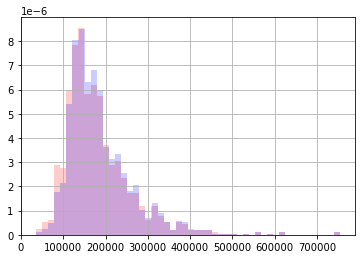

In [58]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red', alpha=0.2)
dataHP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue', alpha=0.2)
plt.show()

In [64]:
# Carga el dataframe
df = dataHP

# Se divide el dataframe en dos dataframe un df para realizar las iputaciones numericas y otro df para realizar las imputaciontes categoricas. 
# Esta seria para las imputaciones numericas. 
num_df = df.select_dtypes(include=[np.number])
# Esta seria pra las imputaciones de categoria. 
cat_df = df.select_dtypes(exclude=[np.number])


In [65]:
# 1. Imputación de variables numéricas 
# Se toma como criterigo general realizar las imputaciones numericas utilizando el promedio. 
num_imputer = SimpleImputer(strategy='mean') 
num_df = pd.DataFrame(num_imputer.fit_transform(num_df), columns=num_df.columns)
num_df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [67]:
# 2. Imputación de variables categóricas.
# Rellenaremos los espacios de categoria con los datos mas frecuentes. 
cat_imputer = SimpleImputer(strategy='most_frequent') 
cat_df = pd.DataFrame(cat_imputer.fit_transform(cat_df), columns=cat_df.columns)
cat_df


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [68]:
# 3. Codificación de variables categóricas
# "First" : liminará la primera columna de categoría para cada variable categórica después de realizar la codificación one-hot
# "None" : mantendrá todas las columnas codificadas 
encoder = OneHotEncoder(drop='first') 
cat_df = pd.DataFrame(encoder.fit_transform(cat_df).toarray(), columns=encoder.get_feature_names(cat_df.columns))

# Volvemos a unir los dos df con las diferentes imputaciones. 
df = pd.concat([num_df, cat_df], axis=1)

df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# 4. Tratamiento de outliers
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)] # mantener sólo las filas con z-score < 3

In [34]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
22,23.0,20.0,75.0,9742.0,8.0,5.0,2002.0,2002.0,281.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32,33.0,20.0,85.0,11049.0,8.0,5.0,2007.0,2007.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
36,37.0,20.0,112.0,10859.0,5.0,5.0,1994.0,1995.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38,39.0,20.0,68.0,7922.0,5.0,7.0,1953.0,2007.0,0.0,731.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1367.0,60.0,68.0,9179.0,7.0,5.0,1999.0,1999.0,158.0,633.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1372,1373.0,60.0,75.0,9750.0,7.0,6.0,1998.0,1998.0,0.0,975.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1390,1391.0,20.0,70.0,9100.0,7.0,5.0,2000.0,2000.0,244.0,1400.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1410,1411.0,60.0,79.0,12420.0,7.0,5.0,2001.0,2001.0,0.0,666.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [60]:
#Revisar datos faltantes
df.isnull().mean()

Id                       0.0
MSSubClass               0.0
LotFrontage              0.0
LotArea                  0.0
OverallQual              0.0
                        ... 
SaleCondition_AdjLand    0.0
SaleCondition_Alloca     0.0
SaleCondition_Family     0.0
SaleCondition_Normal     0.0
SaleCondition_Partial    0.0
Length: 247, dtype: float64